In [1]:
import numpy as np
signals = np.array([[1,2],[3,4],[10,0]])
sample = np.array([3,-1])
np.inner(signals, sample)

array([ 1,  5, 30])

In [5]:
import numpy as np
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector = np.array([0,1,-1])
len(A), len(search_vector) # nghĩa là = (10, 3)

(10, 3)

In [8]:
B = np.array([1])
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1): # so dong
  for j in range(len(search_vector)): # so cot
    B[i,j] = A[i+j]

print(B)

[[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]


In [9]:
C = np.inner(B, search_vector)
for i in range(len(A)-len(search_vector)+1): # tìm vị trí của vector vừa tìm thấy
  if ( C[0,i] == np.inner(search_vector, search_vector) ):
    print (i, B[i])

6 [[ 0  1 -1]]


In [49]:
from google.colab import files
uploadeds = files.upload()

Saving Traidat.png to Traidat (2).png


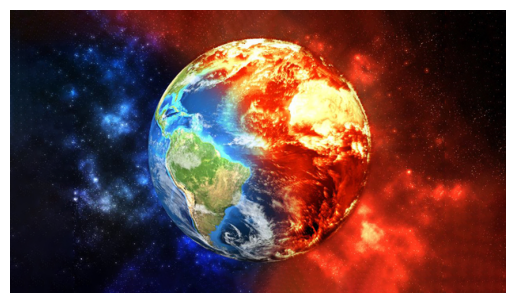

In [51]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('Traidat (2).png')
img.height
img.width
img.mode
img = img.convert("RGB")
new_width = int(img.width / 2)
new_height = int(img.height / 2)
new_img = img.resize((new_width, new_height),Image.LANCZOS)
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [53]:
from PIL import Image, ImageDraw
input_image = Image.open('Traidat (2).png')
input_pixels = input_image.load() # đọc các pixel(điểm ảnh). GV giải thích khái niệm pixel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
[1 / 9, 1 / 9, 1 / 9],
[1 / 9, 1 / 9, 1 / 9]]

In [54]:
kernel = box_kernel
offset = len(kernel) // 2

In [55]:
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

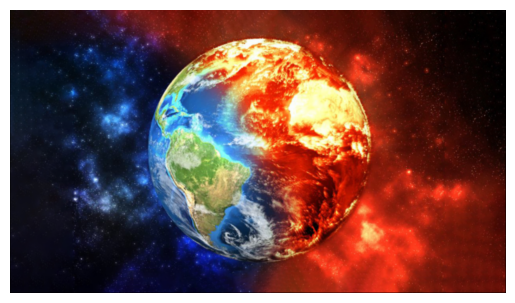

In [56]:
import matplotlib.pyplot as plt
for x in range(offset, input_image.width - offset):
  for y in range(offset, input_image.height - offset):
    acc = [0, 0, 0]
    for a in range(len(kernel)):
      for b in range(len(kernel)):
        xn = x + a - offset
        yn = y + b - offset
        pixel = input_pixels[xn, yn]
        acc[0] += pixel[0] * kernel[a][b]
        acc[1] += pixel[1] * kernel[a][b]
        acc[2] += pixel[2] * kernel[a][b]
    draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
plt.imshow(output_image)
plt.axis('off')
plt.show()

In [44]:
x = np.dot(A, x)
print (x)

[1.         0.33333333 0.83333333 1.83333333]


In [46]:
x = np.array([1, 1, 1, 1]) # Initialize x with 10 elements
for i in range(10):
  x = np.dot(A, x)
  print (i+1, x)

1 [1.         0.33333333 0.83333333 1.83333333]
2 [1.33333333 0.33333333 1.25       1.08333333]
3 [1.16666667 0.44444444 0.98611111 1.40277778]
4 [1.19444444 0.38888889 1.09027778 1.32638889]
5 [1.20833333 0.39814815 1.06134259 1.33217593]
6 [1.19675926 0.40277778 1.06886574 1.33159722]
7 [1.20023148 0.39891975 1.06471836 1.3361304 ]
8 [1.20042438 0.40007716 1.06814236 1.3313561 ]
9 [1.19974923 0.40014146 1.06581951 1.3342898 ]
10 [1.20005466 0.39991641 1.06706131 1.33296762]


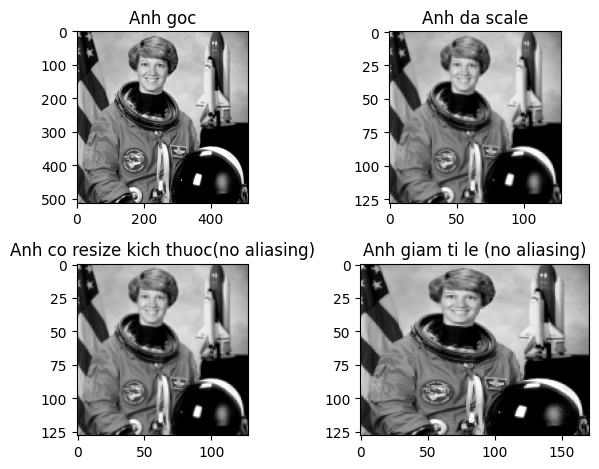

In [47]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 1.0 / 4.0)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')  # the hien mau xam
ax[0].set_title("Anh goc")

ax[1].imshow(image_rescaled, cmap='gray')  # the hien mau xam
ax[1].set_title("Anh da scale")

ax[2].imshow(image_resized, cmap='gray')  # the hien mau xam
ax[2].set_title("Anh co resize kich thuoc(no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')  # the hien mau xam
ax[3].set_title("Anh giam ti le (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()


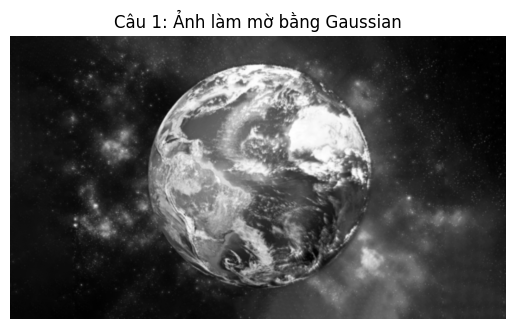

In [57]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Mở và chuyển ảnh sang thang độ xám
img = Image.open("Traidat (2).png").convert("L")
img_array = np.array(img)

# Kernel Gaussian 5x5 (chuẩn hóa với hệ số 1/256)
gauss_kernel = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
]) / 256

# Convolve (tích chập)
blurred = convolve2d(img_array, gauss_kernel, mode='same', boundary='symm')

# Hiển thị ảnh
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title("Câu 1: Ảnh làm mờ bằng Gaussian")
plt.show()

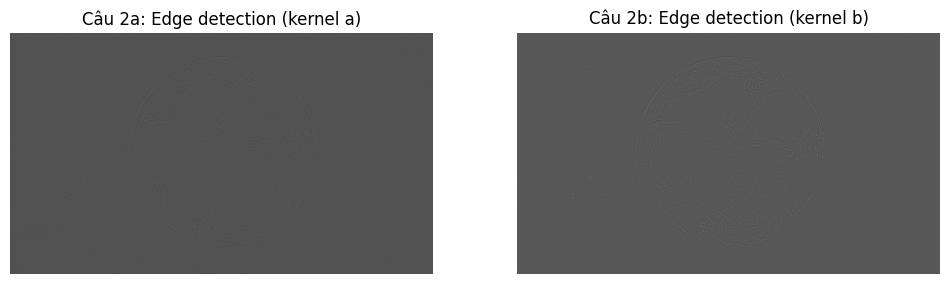

In [61]:
# Kernel a và b
kernel_a = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

kernel_b = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

# Áp dụng kernel a
edge_a = convolve2d(img_array, kernel_a, mode='same', boundary='symm')
# Áp dụng kernel b
edge_b = convolve2d(img_array, kernel_b, mode='same', boundary='symm')

# Hiển thị kết quả
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(edge_a, cmap='gray')
plt.axis('off')
plt.title("Câu 2a: Edge detection (kernel a)")

plt.subplot(1, 2, 2)
plt.imshow(edge_b, cmap='gray')
plt.axis('off')
plt.title("Câu 2b: Edge detection (kernel b)")

plt.show()